<div style="text-align: center">
  <h1 style="font-size: 48px;">Consumo de Moluscos Bivalves</h1>
</div>
    
<div style="text-align: center"> <h2>Análise Exploratória e Calculo do Consumo dos dados do IAN_AF<h2>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import skim
sns.set_style("whitegrid")
plt.style.use("bmh")
import warnings
warnings.filterwarnings("ignore")

# Introdução

Análise dos dados provenientes do Inquérito Alimentar Nacional e da Atividade Física (IAN-AF). Mais especificamento análise do consumo de moluscos bivalves.
O Inquérito Alimentar Nacional e de Atividade Física (IAN-AF) foi realizado em Portugal entre os anos de 2015 e 2016. O objetivo principal do inquérito foi avaliar o estado nutricional da população portuguesa, bem como a sua alimentação e níveis de atividade física.
A amostra do inquérito foi representativa da população portuguesa, com idades entre os 3 meses e os 84 anos. Foram incluídos no estudo um total de 6648 participantes, que foram selecionados através de um processo de amostragem aleatória estratificada por conglomerados.
O IAN-AF foi conduzido por uma equipa de investigadores do Instituto Nacional de Saúde Doutor Ricardo Jorge (INSA), em colaboração com outras instituições nacionais e internacionais. Os resultados do inquérito foram publicados em 2017, numa série de relatórios técnicos e científicos que estão disponíveis para consulta pública.

As entrevistas foram destribuidas ao longo de 12 meses, ou seja, os dados análisados de seguida dizem respeito ao consumo de moluscos bivalves no espaço temporal de 365 dias.

# Objetivos

Determinar o consumo de cada espécie de moluscos bivalves na população portuguesa, por sexo, grupo etário e região.

# Análise Exploratória

In [2]:
dataset = pd.read_excel("Consumo_Bivalves_Análise_R.xlsx")

In [3]:
dataset.head()

,Espécie,IAN_ID,Entrevista,Refeição,Prato,Receita,ING_ID,Cru.Edível,Cru.Bruto,NUT,PSU,Ponderador1,Ponderador2,Sexo,Idade,GrupoEtario
0,Ameijoa,1-02-01-1-15-020,2,Almoço,Arroz de Marisco,RCP_915,80300005,10.304279,36.800998,1,1.02,5694.805467,6749.5020,1,28,3
1,Ameijoa,1-04-01-0-13-032,2,Almoço,Arroz de Marisco,RCP_915,80300005,2.033220,7.261500,1,1.04,816.666667,816.6667,1,5,1
2,Ameijoa,1-04-01-0-16-136,1,Almoço,Amêijoas à Bulhão Pato,RCP_1379,80300005,35.653527,127.334025,1,1.04,5302.083333,5302.0830,1,57,3
3,Ameijoa,1-08-01-0-07-026,2,Almoço,Feijoada de Marisco,RCP_52,80300005,5.148542,18.387651,1,1.08,7124.326538,7124.3270,0,70,4
4,Ameijoa,1-08-01-0-16-135,1,Almoço,Carne de Porco à Alentejana,RCP_609,80300005,28.921198,103.289994,1,1.08,8443.085944,8443.0860,1,37,3


__Significado de variáveis relevantes para o estudo:__

> **Espécie**: Espécie de molusco bivalve consumida

> **IAN_ID**: Identificação do participante.

> **Cru.Edível**: parte comestível de um alimento após a remoção de partes não comestíveis (g/refeição)

> **Cru.Bruto**: peso total de um alimento, incluindo partes não comestíveis (g/refeição)

É de salientar que entre estas duas últimas variáveis a Cru.Edível será utilizada neste estudo para inferir o consumo.

> **NUT**:  Região do País à qual pertence o participante:
* 1 = Norte
* 2 = Centro
* 3 = Área Metropolitana de Lisboa
* 4 = Alentejo
* 5 = Algarve
* 6 = Região Autónoma da Madeira
* 7 = Região Autónoma dos Açores

> **PSU**: Primary Sample Unit à qual pertence o 
participante.

> **Ponderador1**: Ponderador calculado para a taxa de 
participação da primeira entrevista 
(flowchart ≥ 6 ). Utilizado para calculo das dimensões de atividade fisica

> **Ponderador2**: Ponderador calculado para a taxa de 
participação da segunda entrevista 
(flowchart =7 )

> **Sexo**:Sexo do participante: 
* 0 = Feminino
* 1 = Masculino

> **Idade**: Idade do participante (anos) - inteiro, 
arredondamento por defeito.

> **GrupoEtario**: Grupoo etário correspondente à idade na 
primeira entrevista.
* 1 = Crianças (<10 anos)
* 2 = Adolescentes (10-17 anos)
* 3 = Adultos (18-84 anos)
* 4 = Idosos (>84 anos)

In [4]:
skim(dataset)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 299    │ │ int32       │ 6     │                                                          │
│ │ Number of columns │ 16     │ │ string      │ 5     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 5     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name   ┃ NA  ┃ NA %  ┃ mean       ┃ sd     ┃ p0        ┃ p25       ┃ p75       ┃ p100      ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ Entrevista    │   0 │     0 │        1.5 │    0.5 │         1 │         1 │         2 │         2 │ █    █ │  │
│ │ ING_ID        │   0 │     0 │   80000000 │  12000 │  80000000 │  80000000 │  80000000 │  80000000 │      █ │  │
│ │ Cru.Edível    │   0 │     0 │         20 │     23 │      0.76 │       5.2 │        29 │       130 │  █▃▁   │  │
│ │ Cru.Bruto     │   0 │     0 │         74 │     82 │       3.1 │        18 │       100 │       640 │   █▁   │  │
│ │ NUT           │   0 │     0 │        3.7 │    1.8 │         1 │         2 │         5 │         7 │ ▅▆▆▅█▅ │  │
│ │ PSU           │   0 │     0 │        3.8 │    1.8 │         1 │       2.1 │       5.1 │       7.1 │ ▅▆▇▅█▃ │  │
│ │ Ponderador1   │   0 │     0 │       1800 │   1800 │        24 │       510 │      2400 │      9700 │  █▃▁▁  │  │
│ │ Ponderador2   │   0 │     0 │       1900 │   2000 │        29 │       560 │      2700 │      9700 │  █▃▁▁  │  │
│ │ Sexo          │   0 │     0 │       0.55 │    0.5 │         0 │         0 │         1 │         1 │ ▆    █ │  │
│ │ Idade         │   0 │     0 │         37 │     20 │         1 │        22 │        52 │        84 │ ▅▆█▆▅▁ │  │
│ │ GrupoEtario   │   0 │     0 │        2.8 │   0.78 │         1 │         3 │         3 │         4 │ ▁ ▁ █▁ │  │
│ └───────────────┴─────┴───────┴────────────┴────────┴───────────┴───────────┴───────────┴───────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Espécie                   │       0 │          0 │                            1 │                      300 │  │
│ │ IAN_ID                    │       0 │          0 │                            1 │                      300 │  │
│ │ Refeição                  │       0 │          0 │                            1 │                      300 │  │
│ │ Prato                     │       0 │          0 │                            1 │                      300 │  │
│ │ Receita                   │      32 │         11 │                            1 │                      300 │  │
│ └───────────────────────────┴─────────┴────────────┴──

Tal como podemos observar só temos NaN´s na variável receita, cerca de 11%. Pelo que este não constitui um problema pois está não se trata de uma variável relevante para o estudo.

In [5]:
dataset.drop(columns=["IAN_ID","Entrevista","ING_ID"], inplace=True)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Espécie      299 non-null    object 
 1   Refeição     299 non-null    object 
 2   Prato        299 non-null    object 
 3   Receita      267 non-null    object 
 4   Cru.Edível   299 non-null    float64
 5   Cru.Bruto    299 non-null    float64
 6   NUT          299 non-null    int64  
 7   PSU          299 non-null    float64
 8   Ponderador1  299 non-null    float64
 9   Ponderador2  299 non-null    float64
 10  Sexo         299 non-null    int64  
 11  Idade        299 non-null    int64  
 12  GrupoEtario  299 non-null    int64  
dtypes: float64(5), int64(4), object(4)
memory usage: 30.5+ KB


In [7]:
# Alterar datatype das variáveis: NUT, Sexo e GrupoEtário para string
dataset["NUT"] = dataset["NUT"].astype("str")
dataset["Sexo"] = dataset["Sexo"].astype("str")
dataset["GrupoEtario"] = dataset["GrupoEtario"].astype("str")

In [8]:
dataset.describe()

,Cru.Edível,Cru.Bruto,PSU,Ponderador1,Ponderador2,Idade
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,20.481754,74.161033,3.767224,1771.336132,1948.426925,36.953177
std,22.513592,82.328706,1.817724,1794.592805,1955.344402,20.229667
min,0.762457,3.121875,1.010000,24.344477,29.209590,1.000000
25%,5.152140,18.400499,2.130000,506.131177,562.787550,21.500000
50%,12.182560,45.959727,4.020000,1258.566374,1377.114000,37.000000
75%,28.921198,103.289994,5.080000,2374.466903,2693.155611,52.000000
max,134.000000,638.095238,7.060000,9663.893870,9663.894000,84.000000


Analisando a tabela anterior é possível concluir os seguintes factos acerca das nossas variáveis:
* **Cru.Edível**: varia entre 0.76g/refeição e 134 g/refeição, tendo em média sido consumido cerca de 20.48 g de moluscos bivalves por refeição.

* **Idade**: é verificado que o consumo de moluscos bivalves é efetuada por pessoas desde os 1 anos até aos 84 anos, o que representa grupos etários da classe 1 até à classe 4.

_Espécie_

In [9]:
dataset["Espécie"].value_counts()

Ameijoa       208
Berbigao       44
Mexilhao       38
Conquilhas      4
Vieiras         3
Ostra           2
Name: Espécie, dtype: int64

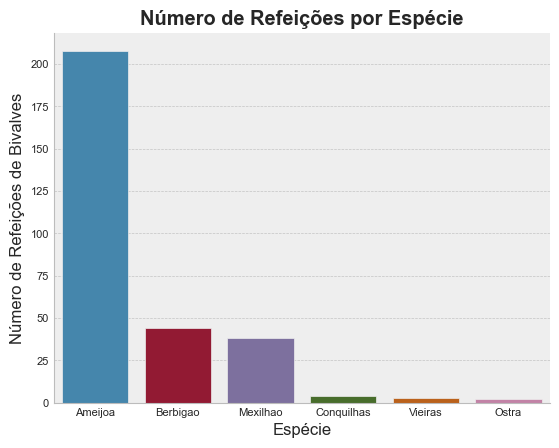

In [10]:
sns.countplot(x="Espécie", data=dataset, order=dataset["Espécie"].value_counts().index)

plt.title("Número de Refeições por Espécie", fontweight="bold")
plt.xlabel("Espécie")
plt.ylabel("Número de Refeições de Bivalves")

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.grid(axis="y", linestyle='--', alpha=0.7)
sns.despine(top=True, right=True)

plt.show()

Tal como é possível verificar a espécie ameijoa é a que apresenta maior número de dados com 208 refeições/365 dias. Pelo o contrário a espécie ostra é a que apresenta menor número de daods com 2 refeições/365 dias.

_Grupo Etário_

In [11]:
dataset["GrupoEtario"].value_counts()

3    209
1     35
4     31
2     24
Name: GrupoEtario, dtype: int64

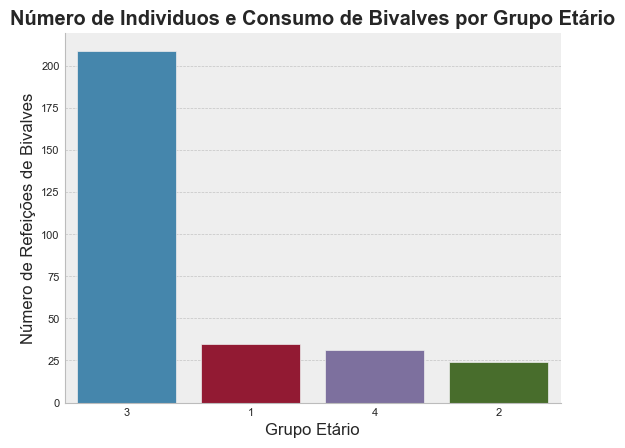

In [12]:
sns.countplot(x="GrupoEtario", data=dataset, order=dataset["GrupoEtario"].value_counts().index)

plt.title("Número de Individuos e Consumo de Bivalves por Grupo Etário", fontweight="bold")
plt.xlabel("Grupo Etário")
plt.ylabel("Número de Refeições de Bivalves")

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.grid(axis="y", linestyle='--', alpha=0.7)
sns.despine(top=True, right=True)

plt.show()

_Sexo_

In [13]:
dataset["Sexo"].value_counts()

1    165
0    134
Name: Sexo, dtype: int64

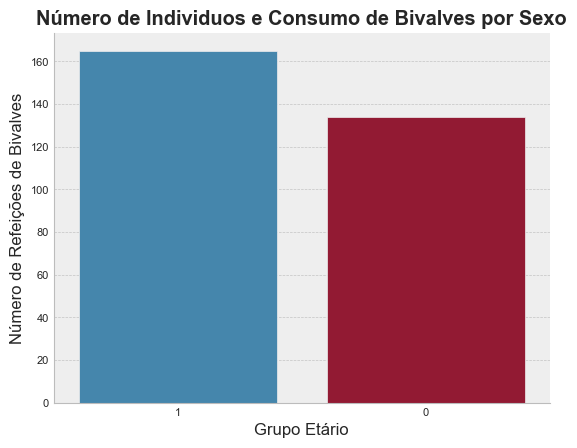

In [14]:
sns.countplot(x="Sexo", data=dataset, order=dataset["Sexo"].value_counts().index)

plt.title("Número de Individuos e Consumo de Bivalves por Sexo", fontweight="bold")
plt.xlabel("Grupo Etário")
plt.ylabel("Número de Refeições de Bivalves")

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.grid(axis="y", linestyle='--', alpha=0.7)
sns.despine(top=True, right=True)

plt.show()

In [15]:
dataset.groupby("Espécie").agg("mean","std")

,Cru.Edível,Cru.Bruto,PSU,Ponderador1,Ponderador2,Idade
Espécie,,,,,,
Ameijoa,22.179096,79.607755,3.996971,1571.326896,1741.944130,36.043269
Berbigao,12.228403,58.230490,2.617500,2491.993104,2727.109339,36.250000
Conquilhas,71.467200,148.890000,5.082500,830.039793,895.906650,43.000000
Mexilhao,16.282931,55.818740,3.653947,2192.674756,2366.156175,42.815789
Ostra,10.800000,120.000000,5.085000,628.116671,706.645150,37.000000
Vieiras,15.507533,32.307361,3.503333,1749.259717,1783.869733,28.000000


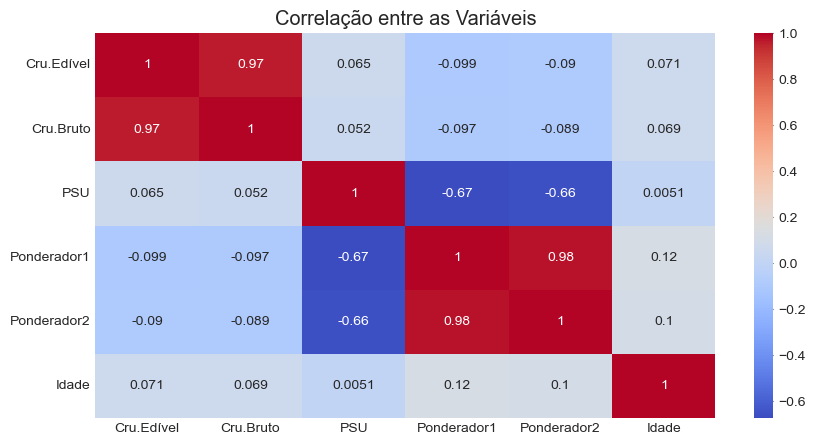

In [16]:
corr = dataset.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True, cmap = "coolwarm")
plt.title("Correlação entre as Variáveis")
plt.show()

Tendo em consideração os nossos dados não faz sentido analisar a correlação de todas as variáveis. Sendo só interessante ver a correlaçãoe ntre idade e cru.edível

In [17]:
coor_data= dataset[["Cru.Edível","Idade"]]

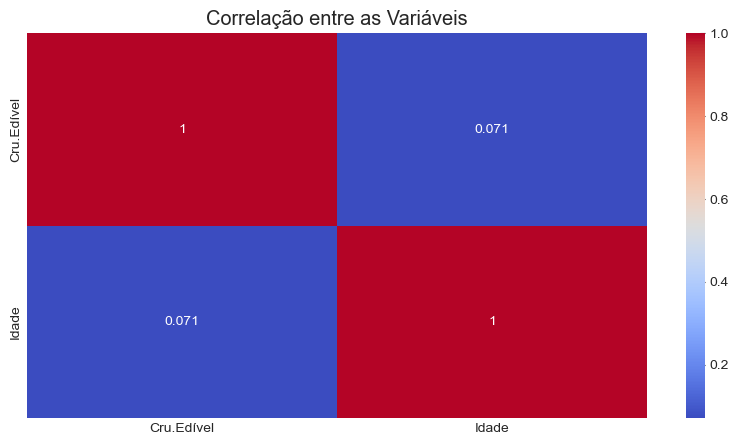

In [18]:
corr = coor_data.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True, cmap = "coolwarm")
plt.title("Correlação entre as Variáveis")
plt.show()

É possível verificar que a correlação entre o consumo de bivalves e a idade é muito fraca, sendo possível concluir que aparentemente não parece que o consumo de bivalves esteja associada à idade. Porém este facto será analisado com mais detalhe.

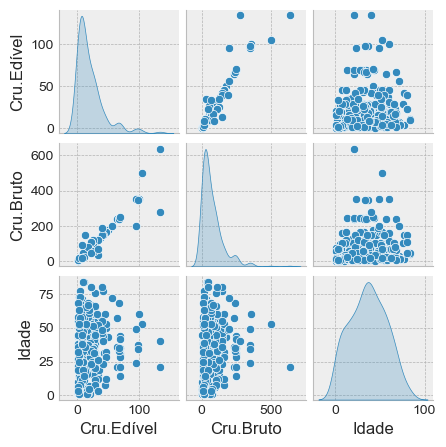

In [19]:
sns.pairplot(dataset[["Cru.Edível","Cru.Bruto","Idade"]], height=1.5,diag_kind = 'kde')
plt.show()

É verificado que as variáveis Cru.Edível e Cru.Bruto não seguem uma distribuição normal, mas sim uma distribuição logaritmica. Porém a variável idade apresenta uma distribuição normal

<AxesSubplot:xlabel='Cru.Edível'>

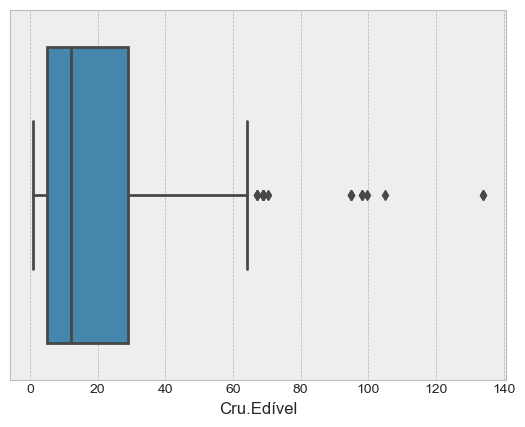

In [20]:
sns.boxplot(dataset["Cru.Edível"])

<AxesSubplot:xlabel='Espécie', ylabel='Cru.Edível'>

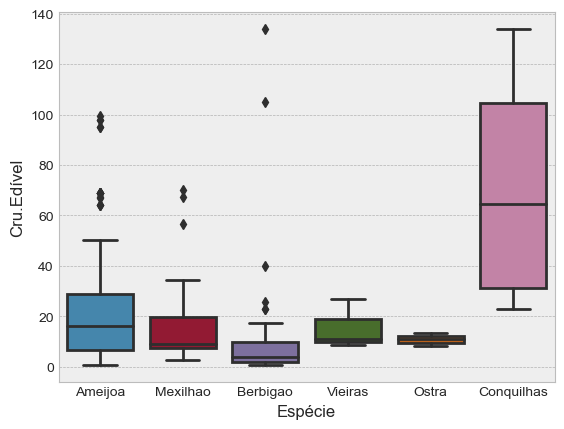

In [21]:
sns.boxplot(dataset["Espécie"], dataset["Cru.Edível"])

Analisando ambos os boxplot´s é verificado que existem alguns outliers porém estes não são muitos o que não parece que vai influênciar os nossos resultados

# Determinação do consumo de cada espéicie de molusco bivalve

Para calcular o consumo de cada espécie de molusco bivalve é necessário efetuar as seguintes etapas:
1. Determinar a frequência de consumo em uma semana por espécie (F).
2. Calcular a quantidade média consumida em cada refeição de cada espécie, por sexo, grupo etário e região(Q).
3. Consumo semanal = F x Q

## 1. Frequência de Consumo Ponderada

In [22]:
dataset.head()

,Espécie,Refeição,Prato,Receita,Cru.Edível,Cru.Bruto,NUT,PSU,Ponderador1,Ponderador2,Sexo,Idade,GrupoEtario
0,Ameijoa,Almoço,Arroz de Marisco,RCP_915,10.304279,36.800998,1,1.02,5694.805467,6749.5020,1,28,3
1,Ameijoa,Almoço,Arroz de Marisco,RCP_915,2.033220,7.261500,1,1.04,816.666667,816.6667,1,5,1
2,Ameijoa,Almoço,Amêijoas à Bulhão Pato,RCP_1379,35.653527,127.334025,1,1.04,5302.083333,5302.0830,1,57,3
3,Ameijoa,Almoço,Feijoada de Marisco,RCP_52,5.148542,18.387651,1,1.08,7124.326538,7124.3270,0,70,4
4,Ameijoa,Almoço,Carne de Porco à Alentejana,RCP_609,28.921198,103.289994,1,1.08,8443.085944,8443.0860,1,37,3


__Por Sexo__

In [23]:
# Calculo da Frenquência de consumo diária
dataset.groupby(["Sexo"])["Ponderador2"].sum() / dataset["Ponderador2"].sum()

Sexo
0    0.38893
1    0.61107
Name: Ponderador2, dtype: float64

In [24]:
# Frequência de Consumo Semanal
freq_semanal_sexo = (dataset.groupby(["Sexo"])["Ponderador2"].sum() / dataset["Ponderador2"].sum())*7
freq_semanal_sexo = freq_semanal_sexo.to_frame()
freq_semanal_sexo.rename(columns={"Ponderador2":"Freq.Cons"}, inplace=True)
freq_semanal_sexo.reset_index(inplace=True)
freq_semanal_sexo.sort_values(by="Freq.Cons", ascending=False, inplace=True)
freq_semanal_sexo

,Sexo,Freq.Cons
1,1,4.277488
0,0,2.722512


In [25]:
freq_semanal_sexo["Freq.Cons"].round(0)

1    4.0
0    3.0
Name: Freq.Cons, dtype: float64

Em média individuos do sexo 1 (Masculino) consumem moluscos bivalves cerca de 4 vezes por semana enquanto que individuos do sexo 0 (Feminino) consumem moluscos bivalves cerca de 3 vezes por semana.

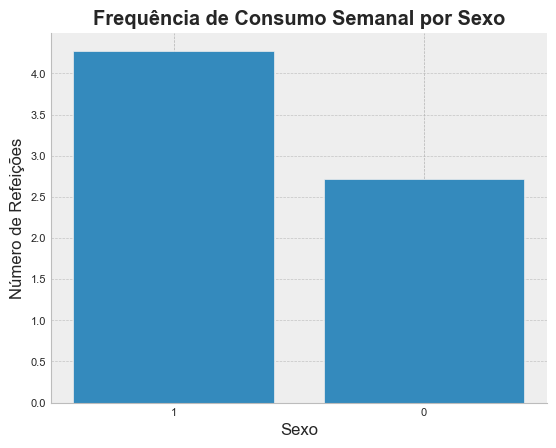

In [26]:
plt.bar(freq_semanal_sexo["Sexo"], freq_semanal_sexo["Freq.Cons"])

plt.title("Frequência de Consumo Semanal por Sexo", fontweight="bold")
plt.xlabel("Sexo")
plt.ylabel("Número de Refeições")

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.grid(axis="y", linestyle='--', alpha=0.7)
sns.despine(top=True, right=True)

plt.show()

__Por Grupo Etário__

In [27]:
# Calculo da Frenquência de consumo diária
dataset.groupby(["GrupoEtario"])["Ponderador2"].sum() / dataset["Ponderador2"].sum()

GrupoEtario
1    0.055079
2    0.062678
3    0.788897
4    0.093346
Name: Ponderador2, dtype: float64

In [28]:
# Frequência de Consumo Semanal
freq_semanal_get = (dataset.groupby(["GrupoEtario"])["Ponderador2"].sum() / dataset["Ponderador2"].sum())*7
freq_semanal_get = freq_semanal_get.to_frame()
freq_semanal_get.rename(columns={"Ponderador2":"Freq.Cons"}, inplace=True)
freq_semanal_get.reset_index(inplace=True)
freq_semanal_get.sort_values(by="Freq.Cons", ascending=False, inplace=True)
freq_semanal_get

,GrupoEtario,Freq.Cons
2,3,5.522279
3,4,0.653424
1,2,0.438748
0,1,0.385550


In [29]:
freq_semanal_get["Freq.Cons"].round(0)

2    6.0
3    1.0
1    0.0
0    0.0
Name: Freq.Cons, dtype: float64

Em média, individuos do grupo etário 3 consumiram moluscos bivalves cerca de 6 vezes por semana, do grupo etário 4 cerca de 1 vez por semana, do grupo etário 2  cerca de 0,04 vezes por semana e do grupo etário 1 cerca de 0.038 vezes por semana, ostras cerca de 0,02 vezes por semana e vieiras cerca de 0,06 vezes por semana.

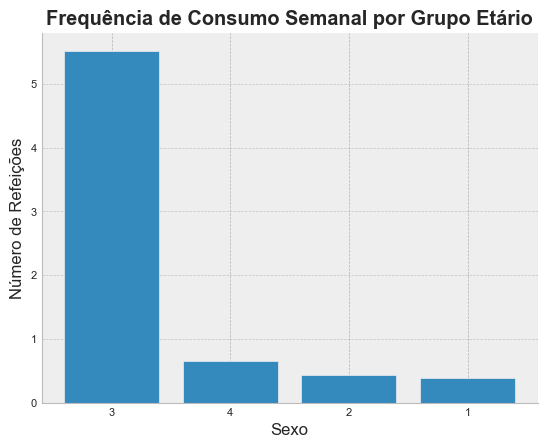

In [30]:
plt.bar(freq_semanal_get["GrupoEtario"], freq_semanal_get["Freq.Cons"])

plt.title("Frequência de Consumo Semanal por Grupo Etário", fontweight="bold")
plt.xlabel("Sexo")
plt.ylabel("Número de Refeições")

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.grid(axis="y", linestyle='--', alpha=0.7)
sns.despine(top=True, right=True)

plt.show()

__Por NUT__

In [31]:
# Calculo da Frenquência de consumo diária
dataset.groupby(["NUT"])["Ponderador2"].sum() / dataset["Ponderador2"].sum()

NUT
1    0.357173
2    0.184423
3    0.258994
4    0.085777
5    0.085278
6    0.013173
7    0.015181
Name: Ponderador2, dtype: float64

In [32]:
# Frequência de Consumo Semanal
freq_semanal_nut = (dataset.groupby(["NUT"])["Ponderador2"].sum() / dataset["Ponderador2"].sum())*7
freq_semanal_nut = freq_semanal_nut.to_frame()
freq_semanal_nut.rename(columns={"Ponderador2":"Freq.Cons"}, inplace=True)
freq_semanal_nut.reset_index(inplace=True)
freq_semanal_nut.sort_values(by="Freq.Cons", ascending=False, inplace=True)
freq_semanal_nut

,NUT,Freq.Cons
0,1,2.500214
2,3,1.812959
1,2,1.290958
3,4,0.600441
4,5,0.596948
6,7,0.106269
5,6,0.092211


In [33]:
freq_semanal_nut["Freq.Cons"].round(0)

0    3.0
2    2.0
1    1.0
3    1.0
4    1.0
6    0.0
5    0.0
Name: Freq.Cons, dtype: float64

Em média individuos da NUT 1 consumem moluscos bivalves cerca de 3 vezes por seman, da NUT 3 cerca de 2 vezes por semana, da NUT 2 e 4 cerca de 1 vez por semana, da NUT 7 cerca de 0.16 vezes por semana e da NUT 6 cerca de 0.09 vezes por semana.

__Por Espécie__

In [34]:
# Calculo da Frenquência de consumo diária
dataset.groupby(["Espécie"])["Ponderador2"].sum() / dataset["Ponderador2"].sum()

Espécie
Ameijoa       0.621931
Berbigao      0.205968
Conquilhas    0.006151
Mexilhao      0.154338
Ostra         0.002426
Vieiras       0.009186
Name: Ponderador2, dtype: float64

In [35]:
freq_semanal = (dataset.groupby(["Espécie"])["Ponderador2"].sum() / dataset["Ponderador2"].sum())*7
freq_semanal = freq_semanal.to_frame()
freq_semanal.rename(columns={"Ponderador2":"Freq.Cons"}, inplace=True)
freq_semanal.reset_index(inplace=True)
freq_semanal.sort_values(by="Freq.Cons", ascending=False, inplace=True)
freq_semanal

,Espécie,Freq.Cons
0,Ameijoa,4.353517
1,Berbigao,1.441777
3,Mexilhao,1.080363
5,Vieiras,0.064302
2,Conquilhas,0.043059
4,Ostra,0.016981


Portanto, em média, os participantes do estudo consumiram ameijoas cerca de 4 vezes por semana, berbigões cerca de 1 vez por semana, conquilhas cerca de 0,05 vezes por semana, mexilhões cerca de 1 vez por semana, ostras cerca de 0,02 vezes por semana e vieiras cerca de 0,06 vezes por semana.

In [36]:
freq_semanal["Freq.Cons"].round(0)

0    4.0
1    1.0
3    1.0
5    0.0
2    0.0
4    0.0
Name: Freq.Cons, dtype: float64

In [37]:
freq_semanal.sort_values(by="Freq.Cons", ascending=False, inplace=True)

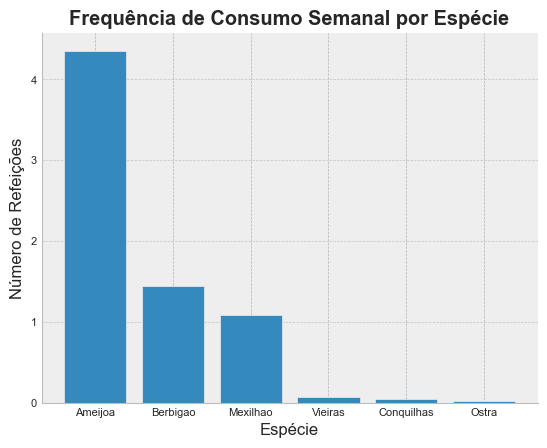

In [38]:
plt.bar(freq_semanal["Espécie"], freq_semanal["Freq.Cons"])

plt.title("Frequência de Consumo Semanal por Espécie", fontweight="bold")
plt.xlabel("Espécie")
plt.ylabel("Número de Refeições")

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.grid(axis="y", linestyle='--', alpha=0.7)
sns.despine(top=True, right=True)

plt.show()

## 2. Porção de consumo (Q).

In [39]:
dataset.head()

,Espécie,Refeição,Prato,Receita,Cru.Edível,Cru.Bruto,NUT,PSU,Ponderador1,Ponderador2,Sexo,Idade,GrupoEtario
0,Ameijoa,Almoço,Arroz de Marisco,RCP_915,10.304279,36.800998,1,1.02,5694.805467,6749.5020,1,28,3
1,Ameijoa,Almoço,Arroz de Marisco,RCP_915,2.033220,7.261500,1,1.04,816.666667,816.6667,1,5,1
2,Ameijoa,Almoço,Amêijoas à Bulhão Pato,RCP_1379,35.653527,127.334025,1,1.04,5302.083333,5302.0830,1,57,3
3,Ameijoa,Almoço,Feijoada de Marisco,RCP_52,5.148542,18.387651,1,1.08,7124.326538,7124.3270,0,70,4
4,Ameijoa,Almoço,Carne de Porco à Alentejana,RCP_609,28.921198,103.289994,1,1.08,8443.085944,8443.0860,1,37,3


__Por Sexo__

In [40]:
porcao_sexo = dataset.groupby("Sexo").agg(Porção_Ponderada=("Cru.Edível", lambda x: np.average(x, weights=dataset.loc[x.index, "Ponderador2"])))
porcao_sexo.reset_index(inplace=True)
porcao_sexo

,Sexo,Porção_Ponderada
0,0,18.057493
1,1,18.696390


__Por Grupo Etário__

In [41]:
porcao_get = dataset.groupby("GrupoEtario").agg(Porção_Ponderada=("Cru.Edível", lambda x: np.average(x, weights=dataset.loc[x.index, "Ponderador2"])))
porcao_get.reset_index(inplace=True)
porcao_get

,GrupoEtario,Porção_Ponderada
0,1,14.601829
1,2,19.302947
2,3,19.073015
3,4,14.860133


__Por NUT__

In [42]:
porcao_nut = dataset.groupby("NUT").agg(Porção_Ponderada=("Cru.Edível", lambda x: np.average(x, weights=dataset.loc[x.index, "Ponderador2"])))
porcao_nut.reset_index(inplace=True)
porcao_nut

,NUT,Porção_Ponderada
0,1,15.573022
1,2,21.282116
2,3,16.659384
3,4,20.159521
4,5,28.356756
5,6,20.180004
6,7,15.332886


__Por Espécie__

In [43]:
dataset.groupby("Espécie").agg(Porção_Ponderada=("Cru.Edível", lambda x: np.average(x, weights=dataset.loc[x.index, "Ponderador2"])))

,Porção_Ponderada
Espécie,
Ameijoa,21.363532
Berbigao,8.914765
Conquilhas,39.359392
Mexilhao,18.528834
Ostra,10.487607
Vieiras,21.538420


In [44]:
porção =dataset.groupby("Espécie").agg(Porção_Cons=("Cru.Edível","mean"))
porção.reset_index(inplace=True)
porção

,Espécie,Porção_Cons
0,Ameijoa,22.179096
1,Berbigao,12.228403
2,Conquilhas,71.467200
3,Mexilhao,16.282931
4,Ostra,10.800000
5,Vieiras,15.507533


## 3. Consumo Semanal

__Por Sexo__

In [45]:
freq_semanal_sexo

,Sexo,Freq.Cons
1,1,4.277488
0,0,2.722512


In [46]:
porcao_sexo

,Sexo,Porção_Ponderada
0,0,18.057493
1,1,18.696390


In [47]:
consumo_sexo = freq_semanal_sexo.merge(porcao_sexo, how="left", left_on="Sexo", right_on="Sexo")
consumo_sexo

,Sexo,Freq.Cons,Porção_Ponderada
0,1,4.277488,18.696390
1,0,2.722512,18.057493


In [48]:
consumo_sexo["Consumo semanal (g/semana)"] = consumo_sexo["Freq.Cons"] * consumo_sexo["Porção_Ponderada"]
consumo_sexo

,Sexo,Freq.Cons,Porção_Ponderada,Consumo semanal (g/semana)
0,1,4.277488,18.696390,79.973585
1,0,2.722512,18.057493,49.161740


Consumo de moluscos bivalves é mais elevados em individuos do sexo masculino (1) apresentando um consumo semanla de 79.97 g/semana. Enquanto que no caso do sexo feminino é verificado um consumo semnanal de moluscos bivalves de cerca de 49.16 g/semana.

__Por Grupo Etário__

In [49]:
freq_semanal_get

,GrupoEtario,Freq.Cons
2,3,5.522279
3,4,0.653424
1,2,0.438748
0,1,0.385550


In [50]:
porcao_get

,GrupoEtario,Porção_Ponderada
0,1,14.601829
1,2,19.302947
2,3,19.073015
3,4,14.860133


In [51]:
consumo_get = freq_semanal_get.merge(porcao_get, how="left", left_on="GrupoEtario", right_on="GrupoEtario")
consumo_get

,GrupoEtario,Freq.Cons,Porção_Ponderada
0,3,5.522279,19.073015
1,4,0.653424,14.860133
2,2,0.438748,19.302947
3,1,0.385550,14.601829


In [52]:
consumo_get["Consumo semanal (g/semana)"] = consumo_get["Freq.Cons"] * consumo_get["Porção_Ponderada"]
consumo_get

,GrupoEtario,Freq.Cons,Porção_Ponderada,Consumo semanal (g/semana)
0,3,5.522279,19.073015,105.326510
1,4,0.653424,14.860133,9.709965
2,2,0.438748,19.302947,8.469121
3,1,0.385550,14.601829,5.629728


Relativamente ao consumo de moluscos bivalves por grupo etário, este é mais elevado em individuos pertencentes ao grupo etário 3, ou seja em adultos com idades compreendidas entre os 18 e os 84 anos, sendo verificado um consumo semanal de 105.32 g/semana.

__Por NUT__

In [53]:
freq_semanal_nut

,NUT,Freq.Cons
0,1,2.500214
2,3,1.812959
1,2,1.290958
3,4,0.600441
4,5,0.596948
6,7,0.106269
5,6,0.092211


In [54]:
porcao_nut

,NUT,Porção_Ponderada
0,1,15.573022
1,2,21.282116
2,3,16.659384
3,4,20.159521
4,5,28.356756
5,6,20.180004
6,7,15.332886


In [55]:
consumo_nut = freq_semanal_nut.merge(porcao_nut, how="left", left_on="NUT", right_on="NUT")
consumo_nut

,NUT,Freq.Cons,Porção_Ponderada
0,1,2.500214,15.573022
1,3,1.812959,16.659384
2,2,1.290958,21.282116
3,4,0.600441,20.159521
4,5,0.596948,28.356756
5,7,0.106269,15.332886
6,6,0.092211,20.180004


In [56]:
consumo_nut["Consumo semanal (g/semana)"] = consumo_nut["Freq.Cons"] * consumo_nut["Porção_Ponderada"]
consumo_nut

,NUT,Freq.Cons,Porção_Ponderada,Consumo semanal (g/semana)
0,1,2.500214,15.573022,38.935888
1,3,1.812959,16.659384,30.202780
2,2,1.290958,21.282116,27.474308
3,4,0.600441,20.159521,12.104606
4,5,0.596948,28.356756,16.927503
5,7,0.106269,15.332886,1.629416
6,6,0.092211,20.180004,1.860823


Analisando o consumo de moluscos bivalves por NUT, ou seja, por região do país, é verificado que o maior consumo de moluscos bivalves está associada à NUT 1, ou seja, à região Centro, apresentando um consumo de 38.935 g/semana.

__Por Espécie__

In [57]:
freq_semanal

,Espécie,Freq.Cons
0,Ameijoa,4.353517
1,Berbigao,1.441777
3,Mexilhao,1.080363
5,Vieiras,0.064302
2,Conquilhas,0.043059
4,Ostra,0.016981


In [58]:
porção

,Espécie,Porção_Cons
0,Ameijoa,22.179096
1,Berbigao,12.228403
2,Conquilhas,71.467200
3,Mexilhao,16.282931
4,Ostra,10.800000
5,Vieiras,15.507533


In [59]:
consumo_especie = freq_semanal.merge(porção, how="left", left_on="Espécie", right_on="Espécie")
consumo_especie

,Espécie,Freq.Cons,Porção_Cons
0,Ameijoa,4.353517,22.179096
1,Berbigao,1.441777,12.228403
2,Mexilhao,1.080363,16.282931
3,Vieiras,0.064302,15.507533
4,Conquilhas,0.043059,71.467200
5,Ostra,0.016981,10.800000


In [60]:
consumo_especie["Consumo semanal (g/semana)"] = consumo_especie["Freq.Cons"] * consumo_especie["Porção_Cons"]

In [61]:
consumo_especie

,Espécie,Freq.Cons,Porção_Cons,Consumo semanal (g/semana)
0,Ameijoa,4.353517,22.179096,96.557080
1,Berbigao,1.441777,12.228403,17.630624
2,Mexilhao,1.080363,16.282931,17.591478
3,Vieiras,0.064302,15.507533,0.997171
4,Conquilhas,0.043059,71.467200,3.077317
5,Ostra,0.016981,10.800000,0.183399


No que diz respeito à espécie é verificado que existe um maior consumo de ameijoa, tendo está um consumo de 96.6 g/semana. Por outro lado, a espécie de ostra é a que verifica um menor consumo com cerca de 0.18g/semana

# Consumo de Cada Espécie de Moluscos Bivalves de acordo com Sexo, Grupo Etário e NUT

__Por Espécie e Sexo__

In [62]:
# Frequência de Consumo Semanal
freq_semanal_esp_sexo = (dataset.groupby(["Espécie","Sexo"])["Ponderador2"].sum() / dataset["Ponderador2"].sum())*7
freq_semanal_esp_sexo = freq_semanal_esp_sexo.to_frame()
freq_semanal_esp_sexo.rename(columns={"Ponderador2":"Freq.Cons"}, inplace=True)
freq_semanal_esp_sexo.sort_values(by="Freq.Cons", ascending=False, inplace=True)
freq_semanal_esp_sexo

Freq.Cons
Espécie    Sexo           
Ameijoa    1      2.660149
           0      1.693368
Berbigao   1      0.846382
Mexilhao   1      0.701979
Berbigao   0      0.595395
Mexilhao   0      0.378384
Vieiras    1      0.060842
Conquilhas 0      0.034922
Ostra      0      0.016981
Conquilhas 1      0.008137
Vieiras    0      0.003461

In [63]:
# Porção
porcao_esp_sexo = dataset.groupby(["Espécie","Sexo"]).agg(Porção_Ponderada=("Cru.Edível", lambda x: np.average(x, weights=dataset.loc[x.index, "Ponderador2"])))
porcao_esp_sexo

Porção_Ponderada
Espécie    Sexo                  
Ameijoa    0            21.006675
           1            21.590697
Berbigao   0            11.871324
           1             6.834948
Conquilhas 0            34.000381
           1            62.358914
Mexilhao   0            13.547519
           1            21.213890
Ostra      0            10.487607
Vieiras    0             8.653000
           1            22.271386

In [64]:
#Consumo semanal
consumo_esp_sexo = freq_semanal_esp_sexo.merge(porcao_esp_sexo, how="left", left_index=True, right_index=True)
consumo_esp_sexo["Consumo semanal (g/semana)"] = consumo_esp_sexo["Freq.Cons"] * consumo_esp_sexo["Porção_Ponderada"]
consumo_esp_sexo.sort_values(by="Espécie", inplace=True)
consumo_esp_sexo

Freq.Cons  Porção_Ponderada  Consumo semanal (g/semana)
Espécie    Sexo                                                         
Ameijoa    1      2.660149         21.590697                   57.434469
           0      1.693368         21.006675                   35.572041
Berbigao   1      0.846382          6.834948                    5.784976
           0      0.595395         11.871324                    7.068122
Conquilhas 0      0.034922         34.000381                    1.187365
           1      0.008137         62.358914                    0.507417
Mexilhao   1      0.701979         21.213890                   14.891698
           0      0.378384         13.547519                    5.126171
Ostra      0      0.016981         10.487607                    0.178094
Vieiras    1      0.060842         22.271386                    1.355025
           0      0.003461          8.653000                    0.029947

__Por Espécie e Grupo Etário__

In [65]:
# Frequência de Consumo Semanal
freq_semanal_esp_get = (dataset.groupby(["Espécie","GrupoEtario"])["Ponderador2"].sum() / dataset["Ponderador2"].sum())*7
freq_semanal_esp_get = freq_semanal_esp_get.to_frame()
freq_semanal_esp_get.rename(columns={"Ponderador2":"Freq.Cons"}, inplace=True)
freq_semanal_esp_get.sort_values(by="Freq.Cons", ascending=False, inplace=True)
freq_semanal_esp_get

Freq.Cons
Espécie    GrupoEtario           
Ameijoa    3             3.393792
Berbigao   3             1.292182
Mexilhao   3             0.765406
Ameijoa    4             0.365156
           2             0.318503
           1             0.276066
Mexilhao   4             0.154554
           2             0.102607
Berbigao   4             0.102252
Mexilhao   1             0.057796
Berbigao   1             0.047343
Vieiras    3             0.046665
Conquilhas 4             0.031461
Vieiras    2             0.017638
Ostra      3             0.016981
Conquilhas 3             0.007253
           1             0.004345

In [66]:
# Porção
porcao_esp_get = dataset.groupby(["Espécie","GrupoEtario"]).agg(Porção_Ponderada=("Cru.Edível", lambda x: np.average(x, weights=dataset.loc[x.index, "Ponderador2"])))
porcao_esp_get

Porção_Ponderada
Espécie    GrupoEtario                  
Ameijoa    1                   15.365574
           2                   24.077682
           3                   22.328051
           4                   14.566433
Berbigao   1                    2.400342
           3                    8.906554
           4                   12.034696
Conquilhas 1                   33.868800
           3                  113.609071
           4                   23.000000
Mexilhao   1                   19.500050
           2                    5.909927
           3                   20.704944
           4                   15.766371
Ostra      3                   10.487607
Vieiras    2                   10.994400
           3                   25.523753

In [67]:
# Consumo Semanal
consumo_esp_get = freq_semanal_esp_get.merge(porcao_esp_get, how="left", left_index=True, right_index=True)
consumo_esp_get["Consumo semanal (g/semana)"] = consumo_esp_get["Freq.Cons"] * consumo_esp_get["Porção_Ponderada"]
consumo_esp_get.sort_values(by="Espécie", inplace=True)
consumo_esp_get

Freq.Cons  Porção_Ponderada  \
Espécie    GrupoEtario                                
Ameijoa    3             3.393792         22.328051   
           1             0.276066         15.365574   
           4             0.365156         14.566433   
           2             0.318503         24.077682   
Berbigao   1             0.047343          2.400342   
           4             0.102252         12.034696   
           3             1.292182          8.906554   
Conquilhas 3             0.007253        113.609071   
           4             0.031461         23.000000   
           1             0.004345         33.868800   
Mexilhao   4             0.154554         15.766371   
           2             0.102607          5.909927   
           1             0.057796         19.500050   
           3             0.765406         20.704944   
Ostra      3             0.016981         10.487607   
Vieiras    3             0.046665         25.523753   
           2             0.017638         10.994400   

                        Consumo semanal (g/semana)  
Espécie    GrupoEtario                              
Ameijoa    3                             75.776763  
           1                              4.241917  
           4                              5.319027  
           2                              7.668802  
Berbigao   1                              0.113639  
           4                              1.230574  
           3                             11.508886  
Conquilhas 3                              0.824021  
           4                              0.723609  
           1                              0.147153  
Mexilhao   4                              2.436755  
           2                              0.606401  
           1                              1.127020  
           3                             15.847692  
Ostra      3                              0.178094  
Vieiras    3                              1.191054  
           2                              0.193917

__Por Espécie e NUT__

In [68]:
# Frequência de Consumo Semanal
freq_semanal_esp_nut = (dataset.groupby(["Espécie","NUT"])["Ponderador2"].sum() / dataset["Ponderador2"].sum())*7
freq_semanal_esp_nut = freq_semanal_esp_nut.to_frame()
freq_semanal_esp_nut.rename(columns={"Ponderador2":"Freq.Cons"}, inplace=True)
freq_semanal_esp_nut.sort_values(by="Freq.Cons", ascending=False, inplace=True)
freq_semanal_esp_nut

Freq.Cons
Espécie    NUT           
Ameijoa    1     1.248550
           3     1.169515
           2     0.874824
Berbigao   1     0.866451
Ameijoa    4     0.485059
           5     0.397437
Mexilhao   3     0.385708
           1     0.385213
Berbigao   2     0.275554
           3     0.214533
Mexilhao   2     0.122943
           5     0.097933
Ameijoa    7     0.092653
           6     0.085480
Mexilhao   4     0.075771
Vieiras    3     0.043204
Conquilhas 5     0.043059
Berbigao   4     0.039611
           5     0.038076
Vieiras    2     0.017638
Ostra      5     0.016981
Mexilhao   7     0.009455
Berbigao   7     0.004161
Vieiras    5     0.003461
Berbigao   6     0.003391
Mexilhao   6     0.003341

In [69]:
# Porção
porcao_esp_nut = dataset.groupby(["Espécie","NUT"]).agg(Porção_Ponderada=("Cru.Edível", lambda x: np.average(x, weights=dataset.loc[x.index, "Ponderador2"])))
porcao_esp_nut

Porção_Ponderada
Espécie    NUT                  
Ameijoa    1           20.351461
           2           22.954623
           3           17.075863
           4           23.539596
           5           32.200550
           6           20.924878
           7           16.626863
Berbigao   1            5.886937
           2           16.771664
           3            9.035773
           4            2.605165
           5           28.014077
           6            1.848955
           7            3.908520
Conquilhas 5           39.359392
Mexilhao   1           21.871886
           2           20.966320
           3           18.492569
           4            7.698441
           5           11.848029
           6           19.725843
           7            7.680227
Ostra      5           10.487607
Vieiras    2           10.994400
           3           26.875200
           5            8.653000

In [70]:
# Consumo Semanal
consumo_esp_nut = freq_semanal_esp_nut.merge(porcao_esp_nut, how="left", left_index=True, right_index=True)
consumo_esp_nut["Consumo semanal (g/semana)"] = consumo_esp_nut["Freq.Cons"] * consumo_esp_nut["Porção_Ponderada"]
consumo_esp_nut.sort_values(by="Espécie", inplace=True)
consumo_esp_nut

Freq.Cons  Porção_Ponderada  Consumo semanal (g/semana)
Espécie    NUT                                                         
Ameijoa    1     1.248550         20.351461                   25.409810
           6     0.085480         20.924878                    1.788648
           5     0.397437         32.200550                   12.797699
           4     0.485059         23.539596                   11.418097
           7     0.092653         16.626863                    1.540536
           2     0.874824         22.954623                   20.081245
           3     1.169515         17.075863                   19.970474
Berbigao   7     0.004161          3.908520                    0.016263
           2     0.275554         16.771664                    4.621492
           3     0.214533          9.035773                    1.938467
           5     0.038076         28.014077                    1.066669
           4     0.039611          2.605165                    0.103194
           6     0.003391          1.848955                    0.006269
           1     0.866451          5.886937                    5.100744
Conquilhas 5     0.043059         39.359392                    1.694782
Mexilhao   7     0.009455          7.680227                    0.072617
           6     0.003341         19.725843                    0.065905
           5     0.097933         11.848029                    1.160312
           2     0.122943         20.966320                    2.577654
           1     0.385213         21.871886                    8.425334
           3     0.385708         18.492569                    7.132732
           4     0.075771          7.698441                    0.583315
Ostra      5     0.016981         10.487607                    0.178094
Vieiras    2     0.017638         10.994400                    0.193917
           5     0.003461          8.653000                    0.029947
           3     0.043204         26.875200                    1.161108

# Consumo de Ameijoa

Tal como foi verificado anteriormente a espécie de ameijoa foi a especia com maior registo de consumo semanal, sendo por este mesmo motivo efetuada de seguida uma análise mais detalhada do consumo de ameijoa.
Nesta análise pretende-se verificar qual as refeição e os pratos associados a um maior consumo de ameijoa

In [71]:
dataset.head()

,Espécie,Refeição,Prato,Receita,Cru.Edível,Cru.Bruto,NUT,PSU,Ponderador1,Ponderador2,Sexo,Idade,GrupoEtario
0,Ameijoa,Almoço,Arroz de Marisco,RCP_915,10.304279,36.800998,1,1.02,5694.805467,6749.5020,1,28,3
1,Ameijoa,Almoço,Arroz de Marisco,RCP_915,2.033220,7.261500,1,1.04,816.666667,816.6667,1,5,1
2,Ameijoa,Almoço,Amêijoas à Bulhão Pato,RCP_1379,35.653527,127.334025,1,1.04,5302.083333,5302.0830,1,57,3
3,Ameijoa,Almoço,Feijoada de Marisco,RCP_52,5.148542,18.387651,1,1.08,7124.326538,7124.3270,0,70,4
4,Ameijoa,Almoço,Carne de Porco à Alentejana,RCP_609,28.921198,103.289994,1,1.08,8443.085944,8443.0860,1,37,3


In [72]:
ameijoa = dataset[dataset["Espécie"]=="Ameijoa"]
ameijoa

,Espécie,Refeição,Prato,Receita,Cru.Edível,Cru.Bruto,NUT,PSU,Ponderador1,Ponderador2,Sexo,Idade,GrupoEtario
0,Ameijoa,Almoço,Arroz de Marisco,RCP_915,10.304279,36.800998,1,1.02,5694.805467,6749.50200,1,28,3
1,Ameijoa,Almoço,Arroz de Marisco,RCP_915,2.033220,7.261500,1,1.04,816.666667,816.66670,1,5,1
2,Ameijoa,Almoço,Amêijoas à Bulhão Pato,RCP_1379,35.653527,127.334025,1,1.04,5302.083333,5302.08300,1,57,3
3,Ameijoa,Almoço,Feijoada de Marisco,RCP_52,5.148542,18.387651,1,1.08,7124.326538,7124.32700,0,70,4
4,Ameijoa,Almoço,Carne de Porco à Alentejana,RCP_609,28.921198,103.289994,1,1.08,8443.085944,8443.08600,1,37,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,Ameijoa,Almoço,Massa de Marisco,RCP_715,17.476199,62.414998,7,7.05,73.404540,76.14589,1,2,1
204,Ameijoa,Jantar,Carne de Porco à Alentejana,RCP_609,28.921198,103.289994,7,7.05,390.484831,443.40900,1,66,4
205,Ameijoa,Jantar,Carne de Porco à Alentejana,RCP_609,16.243413,58.012188,7,7.06,126.358749,151.88560,0,3,1
206,Ameijoa,Jantar,Carne de Porco à Alentejana,RCP_609,16.243413,58.012188,7,7.06,46.835066,54.91904,1,1,1


__Refeição__

In [73]:
ameijoa["Refeição"].value_counts()

Almoço                             113
Jantar                              88
Durante a tarde (Lanche)             4
Pequeno-almoço                       2
Durante a manhã (Meio da manhã)      1
Name: Refeição, dtype: int64

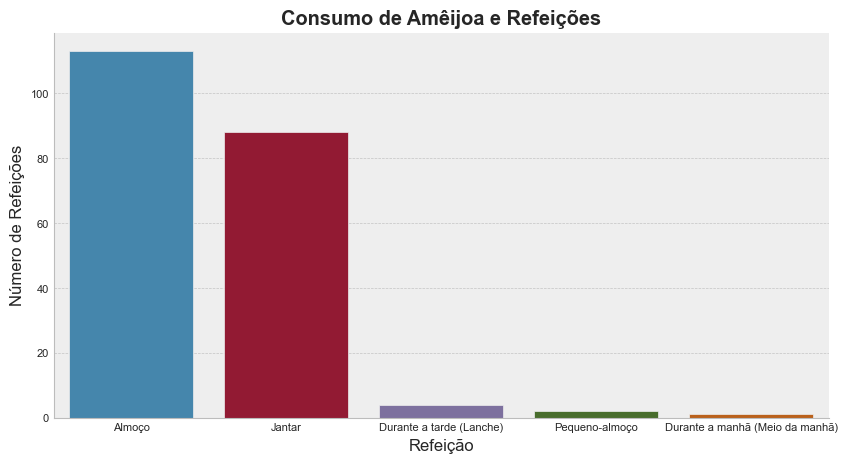

In [74]:
plt.figure(figsize=(10,5))
sns.countplot(x="Refeição", data=ameijoa, order=ameijoa["Refeição"].value_counts().index)

plt.title("Consumo de Amêijoa e Refeições", fontweight="bold")
plt.xlabel("Refeição")
plt.ylabel("Número de Refeições")

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.grid(axis="y", linestyle='--', alpha=0.7)
sns.despine(top=True, right=True)

plt.show()

Atráves do gráfico anterior é verificado que o consumo de ameijoa é maioritariamente efetuado ao almoço.

__Prato__

In [75]:
ameijoa["Prato"].value_counts()

Carne de Porco à Alentejana                                                              71
Massa de Marisco                                                                         48
Arroz de Marisco                                                                         23
Feijoada de Marisco                                                                      17
Amêijoas                                                                                 11
Molho de Amêijoa                                                                          8
Amêijoas à Bulhão Pato                                                                    6
Xérem                                                                                     6
Abrótea Assada com Molho de Amêijoa                                                       6
Massa de peixe                                                                            4
Cataplana de marisco                                                            

In [76]:
# Substituir pratos com número menor ou igual a 6 por "Outro"
counts = ameijoa["Prato"].value_counts()
ameijoa.loc[ameijoa["Prato"].isin(counts[counts <= 8].index), "Prato"] = "Outro"

In [77]:
ameijoa["Prato"].value_counts()

Carne de Porco à Alentejana    71
Massa de Marisco               48
Outro                          38
Arroz de Marisco               23
Feijoada de Marisco            17
Amêijoas                       11
Name: Prato, dtype: int64

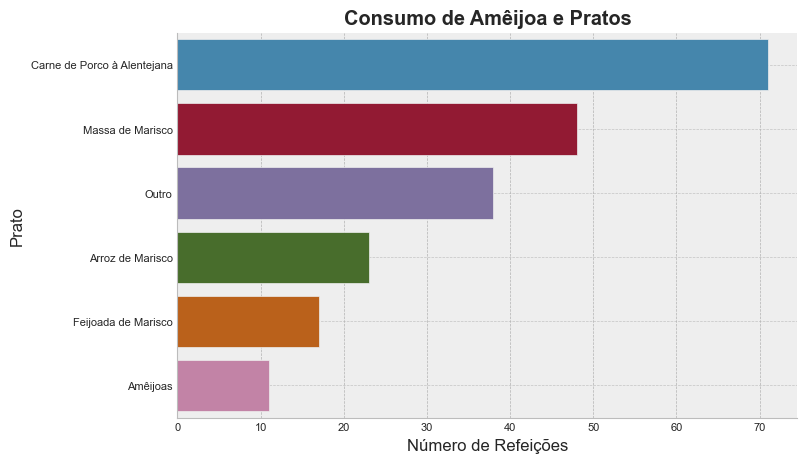

In [83]:
plt.figure(figsize=(8,5))
sns.countplot(y="Prato", data=ameijoa, order=ameijoa["Prato"].value_counts().index)

plt.title("Consumo de Amêijoa e Pratos", fontweight="bold")
plt.xlabel("Número de Refeições")
plt.ylabel("Prato")

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.grid(axis="y", linestyle='--', alpha=0.7)
sns.despine(top=True, right=True)

plt.show()

Tendo em consideração o consumo de ameijoa, é verificado que este consumo é mairitariamente efetuada através da incorporação de ameijoa em receitas, destacando-se a receita de "Carne de Porco à Alentejana"

# Conclusões